## 卷积神经网络 循环神经网络

In [ ]:
# 卷积神经网络非常适合处理在空间上有一定关系的数据
# 循环神经网络非常适合处理在时间上有一定关系的数据

# 卷积神经网络可以理解为空间维度上的参数共享
# 循环神经网络可以理解为时间维度上的参数共享

#### 建立的出发点：参数共享。

In [1]:
# 全连接神经网络最大的问题就是参数个数过多，模型不知道该怎么学习参数。图像（空间关联）、文本（时间关联）
# 全连接神经网络过于简单粗暴，在很多问题上就容易出现过拟合现象。
# 参数集中一下

# 卷积神经网络可以处理任意size的输入图像，前提是不引入任何全连接层的情况
# 循环神经网络可以处理任意长度的输入数据。

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


d:\Download\Appgallery\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def imshow(img, shape=[28, 28]):
    plt.imshow(np.reshape(img,shape))
    plt.show()

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial=tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

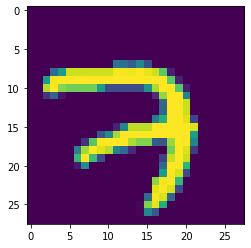

In [5]:
mnist = input_data.read_data_sets('./MNIST_data/',one_hot=True)
one_image=mnist.train.images[0]
imshow(one_image)

In [9]:
input_image=tf.convert_to_tensor(one_image)
image=tf.reshape(input_image,[-1,28,28,1])
# print(image)
W_conv=weight_variable([3,3,1,32])
b_conv=bias_variable([32])
features=tf.nn.conv2d(image,W_conv,strides=[1,1,1,1],padding='SAME')+b_conv

In [10]:
print(features)

Tensor("add:0", shape=(1, 28, 28, 32), dtype=float32)


In [24]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    output_features=sess.run(features)[0]
    print(output_features.shape)
for _ in range(output_features.shape[2]):
    imshow(output_features[:,:,_])

# keras的写法：

In [19]:
# !pip install keras==2.2.4 --upgrade -i http://pypi.douban.com/simple --trusted-host pypi.douban.com
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib as plt
from keras import layers
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.
d:\Download\Appgallery\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
def imshow(img, shape=[28, 28]):
    plt.imshow(np.reshape(img,shape))
    plt.show()

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


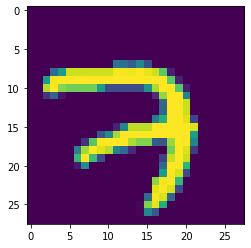

In [21]:
mnist = input_data.read_data_sets('./MNIST_data/',one_hot=True)
one_image=mnist.train.images[0]
imshow(one_image)

In [22]:
input_image=tf.convert_to_tensor(one_image)
image=tf.reshape(input_image,[-1,28,28,1])
features=layers.Conv2D(filters=32,kernel_size=3,padding='same')(image)
print(features)

Tensor("conv2d_1/BiasAdd:0", shape=(1, 28, 28, 32), dtype=float32)


In [25]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    output_features=sess.run(features)[0]
    print(output_features.shape)
for _ in range(output_features.shape[2]):
    imshow(output_features[:,:,_])

## 实现简单的卷积神经网络

In [26]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib as plt
import numpy as np
from keras import layers
%pylab inline

def imshow(img, shape=[28, 28]):
    plt.imshow(np.reshape(img,shape))
    plt.show()

mnist = input_data.read_data_sets('./MNIST_data/',one_hot=True)
regularizer_ratio=0.0

Populating the interactive namespace from numpy and matplotlib
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz


d:\Download\Appgallery\Anaconda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'imshow']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [27]:
def weight_variable(shape,name):
    if regularizer_ratio==0.0:
        initial = tf.truncated_normal(shape, stddev=0.1)
        weight=tf.get_variable(name,initializer=initial)
    else:
        regularizer_ratio=tf.contrib.layers.l2_regularizer(0.0)
        initial = tf.truncated_normal(shape, stddev=0.1)
        weight=tf.get_variable(name,initializer=initial,regularizer=regularizer_ratio)
    return weight

def bias_variable(shape,name):
    initial=tf.constant(0.1, shape=shape)
    return tf.Variable(initial,name=name)

def fcnn(image_batch):
    W_fc1=weight_variable([784,200],name='weight_fc1')
    b_fc1=bias_variable([200],name='bias_fc1')
    W_fc2=weight_variable([200,200],name='weight_fc2')
    b_fc2=bias_variable([200],name='bias_fc2')
    W_out=weight_variable([200,10],name='weight_out')
    b_out=bias_variable([10],name='bias_out')
    hidden_1=tf.nn.sigmoid(tf.matmul(image_batch,W_fc1)+b_fc1)
    hidden_2=tf.nn.dropout(tf.nn.sigmoid(tf.matmul(hidden_1,W_fc2)+b_fc2),0.5)
    _y=tf.nn.softmax(tf.matmul(hidden_2,W_out)+b_out)
    return _y

In [ ]:
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])
y=fcnn(x)
correct_prediction=tf.equal(tf.argmax(y_,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
weight_loss=tf.add_n(tf.losses.get_regularization_losses()) 